<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Machine-Learning/Clustering/KMean%20-%20Heirarchical%20Clustering/classify_wheather_stocks_decrease_or_increase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!git clone https://github.com/noushadkhan01/my_methods

Cloning into 'my_methods'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 200 (delta 27), reused 0 (delta 0), pack-reused 153
Receiving objects: 100% (200/200), 51.99 KiB | 347.00 KiB/s, done.
Resolving deltas: 100% (114/114), done.


In [23]:
%cd my_methods
!ls

/content/my_methods
choose_best_classifier.py	      my_global_variables.py
choose_optimal_number_of_clusters.py  my_roc_curve.py
get_cross_validation.py		      print_model_results.py
my_cap_curve.py			      __pycache__
my_dummy_variable_2.py		      README.md
my_dummy_variable_creator.py	      visualise_classifier_performance.py


In [0]:
import my_global_variables
from get_cross_validation import get_cross_validation
from print_model_results import print_model_results

In [0]:
from choose_best_classifier import choose_best_classifier

In [5]:
%cd ../

/content


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls

gdrive	sample_data


In [0]:
df = pd.read_csv('gdrive/My Drive/stock_data.csv')

In [10]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,Y
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1
1,91.567862,96.621901,98.084599,96.543909,91.678881,96.337918,96.1250,94.015957,94.409201,97.084183,96.351731,95.620450,98.075710,96.470588,99.111111,99.327474,94.726023,92.513163,95.330575,96.487887,105.857628,97.458983,96.971336,94.389733,94.064528,98.720048,100.800030,95.626477,92.337531,92.352792,100.000000,95.448346,98.634815,97.950789,96.026532,99.173291,96.611813,96.831338,94.545847,96.003806,...,96.224293,95.488722,100.000000,101.818182,97.408179,101.554453,98.847545,97.897257,93.055496,96.370364,92.989076,96.777906,94.769697,101.099203,98.069051,98.932214,97.0700,91.611045,102.459279,99.120312,98.714653,95.663493,94.133458,100.000000,100.000000,104.206922,98.903111,98.185123,97.218155,97.292714,96.888889,95.499022,97.457971,99.282297,101.296698,98.310678,100.489134,99.602234,93.263158,-1
2,92.908600,97.640753,103.112398,98.130312,78.041958,97.693843,95.6250,95.744681,94.089712,96.655229,94.293732,100.104235,96.034989,97.843137,101.222400,101.943199,94.247407,90.106749,96.120690,100.184832,110.251104,95.086102,102.325581,94.100642,95.096784,98.481917,100.267291,96.099299,91.464713,95.530522,105.978261,94.669849,98.407284,99.528076,98.806900,104.628087,98.573995,98.787707,100.000000,97.906755,...,93.640754,94.736842,104.519211,105.151515,100.424129,106.606308,93.483725,98.498327,89.074078,97.446316,89.836916,97.016601,92.000945,106.318790,96.275903,101.705728,97.2650,93.422449,105.410098,98.533742,101.671157,93.495100,94.397986,100.826374,97.176774,111.340752,101.919409,97.640370,99.414348,95.093172,97.333333,96.379804,93.397222,100.478469,101.179953,98.141624,96.084839,99.204467,86.421053,1
3,84.869178,94.369892,109.018217,102.209632,73.357203,100.676878,96.9166,93.085106,98.243067,98.113343,95.322732,98.435915,100.524688,101.764706,101.333333,106.128550,92.233233,93.582895,90.517241,101.571147,106.903840,99.322034,101.460249,92.538954,101.677209,102.664087,98.399941,102.482262,92.725595,97.119387,110.144927,101.108080,105.119263,98.107256,106.753836,97.520403,99.820323,101.397194,99.481348,100.761180,...,95.627991,96.240601,110.096117,105.151515,103.251652,108.549256,98.847545,102.101741,90.740602,98.521133,86.630347,97.136049,97.538449,106.593771,100.689583,100.852864,97.0700,94.185082,106.065836,100.097762,106.169666,89.245462,101.599966,105.221978,105.241290,111.719865,104.113187,97.459173,110.834553,97.461792,101.925926,95.988415,94.412410,100.956938,99.287025,102.027024,100.326263,103.985313,77.513179,1
4,88.888889,95.603221,108.459686,103.116147,77.832727,104.677398,100.8750,93.617021,100.000000,99.828542,102.525725,98.123023,108.687945,108.627451,107.777778,107.922272,96.356691,90.641614,94.252874,110.905691,104.393476,104.406780,98.215251,97.975618,100.516128,114.064593,101.067320,103.073289,106.886504,108.042836,122.463768,116.535970,107.053457

In [11]:
df.shape

(3000, 101)

In [12]:
X = df.drop('Y', 1)
X.shape

(3000, 100)

In [13]:
y = df.Y.values
y.shape

(3000,)

# Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2100, 100), (900, 100), (2100,), (900,))

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train model

## Checking which is best Classifier for our Dataset

In [0]:
import warnings
warnings.filterwarnings(action = 'ignore')

LR: 0.491333 (0.026466)
LDA: 0.487000 (0.022728)
KNN: 0.497000 (0.037311)
DTree: 0.502333 (0.037359)
NB: 0.501000 (0.033067)
SVM: 0.489333 (0.037172)


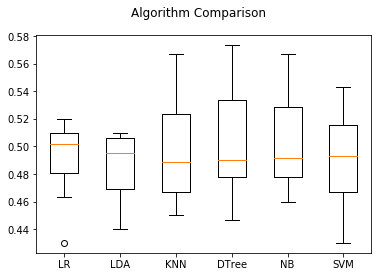

In [22]:
choose_best_classifier(X, y)

In [0]:
from sklearn.linear_model import LogisticRegression

## 1.NaiveBayes Classifier

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

####initialise my global variables first

In [0]:
my_global_variables.init()

In [0]:
from sklearn.naive_bayes import GaussianNB

In [28]:
model = GaussianNB()
model = print_model_results(X_train, X_test, y_train, y_test, model)

 Train score is 0.5166666666666667


Test score is 0.5011111111111111



Train confusion matrix is 
 [[583 464]
 [551 502]]

Test confusion matrix is 
 [[228 233]
 [216 223]]



Test Set classification report is 
               precision    recall  f1-score   support

          -1       0.51      0.49      0.50       461
           1       0.49      0.51      0.50       439

    accuracy                           0.50       900
   macro avg       0.50      0.50      0.50       900
weighted avg       0.50      0.50      0.50       900



## 1.LogisticRegression

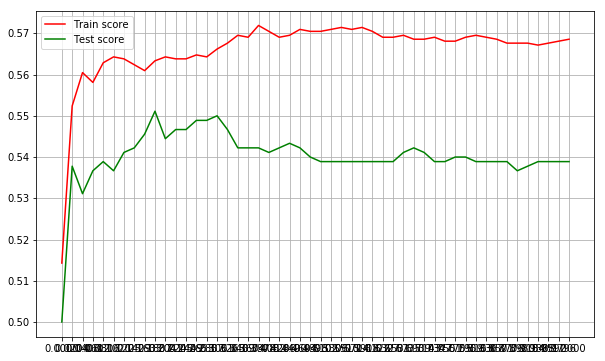

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
x = np.linspace(0.00001, 1, 50)
train_s = []
test_s = []
for i in x:
  model = LogisticRegression(C = i)
  model.fit(X_train, y_train)
  train_s.append(model.score(X_train, y_train))
  test_s.append(model.score(X_test, y_test))
  
plt.figure(figsize = (10, 6))
plt.plot(x, train_s, c = 'r', label = 'Train score')
plt.plot(x, test_s, c = 'g', label = 'Test score')
plt.xticks(x)
plt.legend()
plt.grid()
plt.show()

In [33]:
max(test_s)

0.5511111111111111

## 2.DecisionTreeClassifier

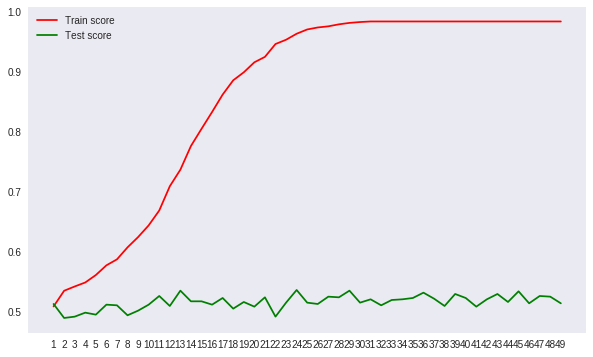

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
x = range(1, 50)
train_s = []
test_s = []
for i in x:
  model = DecisionTreeClassifier(max_depth = i)
  model.fit(X_train, y_train)
  train_s.append(model.score(X_train, y_train))
  test_s.append(model.score(X_test, y_test))
  
plt.figure(figsize = (10, 6))
plt.plot(x, train_s, c = 'r', label = 'Train score')
plt.plot(x, test_s, c = 'g', label = 'Test score')
plt.xticks(x)
plt.legend()
plt.grid()
plt.show()

## 3.KNN

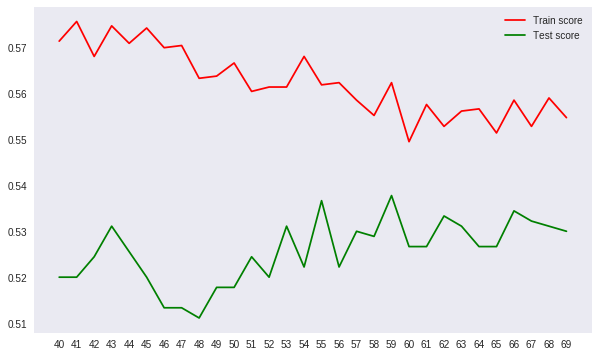

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
x = range(40, 70)
train_s = []
test_s = []
for i in x:
  model = KNeighborsClassifier(i)
  model.fit(X_train, y_train)
  train_s.append(model.score(X_train, y_train))
  test_s.append(model.score(X_test, y_test))
  
plt.figure(figsize = (10, 6))
plt.plot(x, train_s, c = 'r', label = 'Train score')
plt.plot(x, test_s, c = 'g', label = 'Test score')
plt.xticks(x)
plt.legend()
plt.grid()
plt.show()

In [0]:
X_transformed = sc.fit_transform(X)

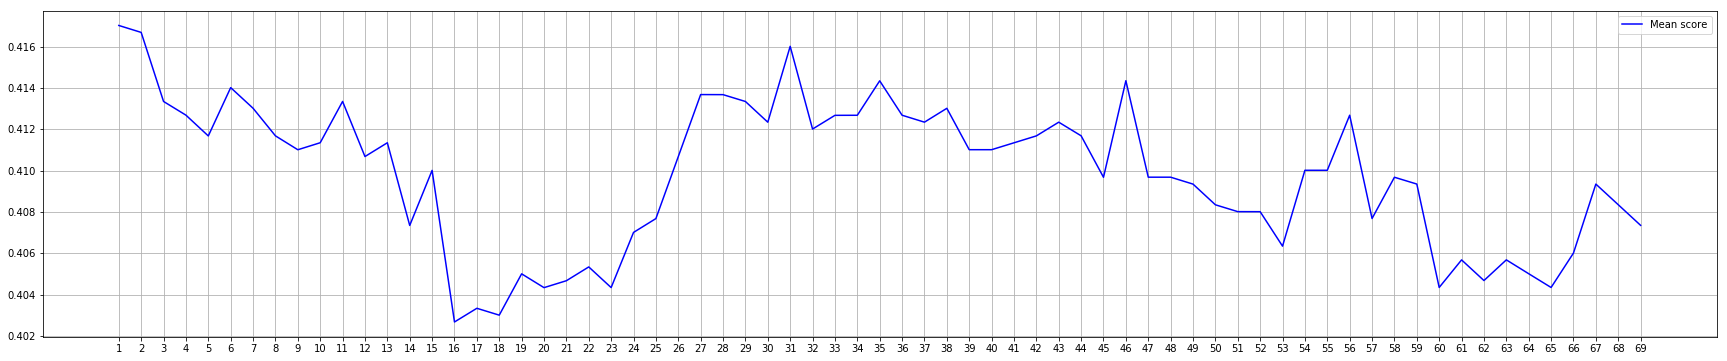

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
x = range(1, 70)
mean_score = []
train_s = []
test_s = []
std = []
for i in x:
  model = KNeighborsClassifier(i)
  cv = cross_val_score(model, X, y, cv = 10)
  #model.fit(X_train, y_train)
  #train_s.append(model.score(X_train, y_train))
  #test_s.append(model.score(X_test, y_test))
  std.append(cv.std())
  mean = np.mean(cv)
  mean_score.append(mean)
  
plt.figure(figsize = (30, 6))
plt.plot(x, mean_score, c = 'b', label = 'Mean score')
#plt.plot(x, train_s, c = 'r', label = 'Train score')
#plt.plot(x, test_s, c = 'g', label = 'Test score')
#plt.plot(x, std, c = 'g', label = 'Variance')
plt.xticks(x)
plt.legend()
plt.grid()
plt.show()

## 4.RandomForestClassifier

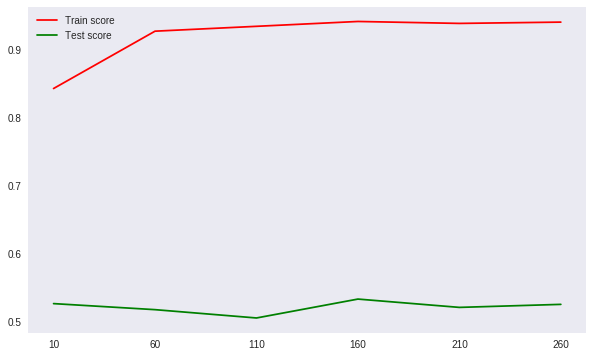

In [0]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = range(10, 300, 50)
train_s = []
test_s = []
for i in x:
  model = RandomForestClassifier(n_estimators = i, max_depth = 10)
  model.fit(X_train, y_train)
  train_s.append(model.score(X_train, y_train))
  test_s.append(model.score(X_test, y_test))
  
plt.figure(figsize = (10, 6))
plt.plot(x, train_s, c = 'r', label = 'Train score')
plt.plot(x, test_s, c = 'g', label = 'Test score')
plt.xticks(x)
plt.legend()
plt.grid()
plt.show()

# Clustering

## Heirarchical cluster

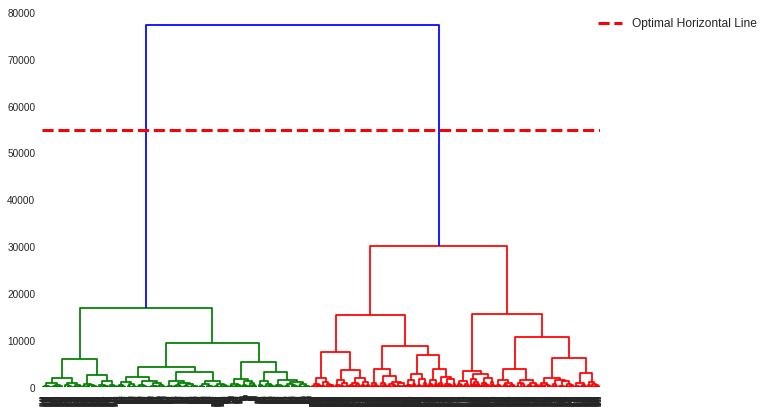

In [0]:
import scipy.cluster.hierarchy as sch
import numpy as np
plt.figure(figsize = (10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y = 55000, linewidth=3, color='r',linestyle = '--', label = 'Optimal Horizontal Line')
plt.plot(())
#method = ward means we are minimizing the variance between clusters, before in k-means  cluster we are minimze the WCSS**
plt.legend(bbox_to_anchor = (1.3, 1), fontsize = 'large')
plt.show()

In [0]:
optimal_clusters = 2

## KmeanCluster

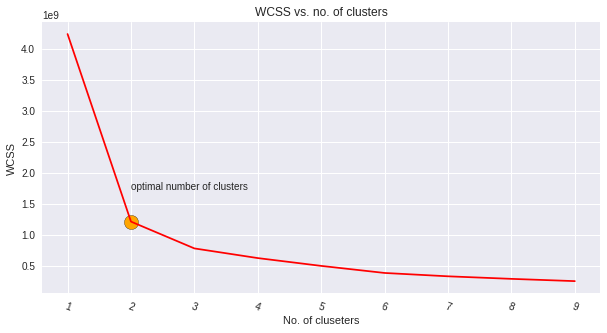

In [0]:
def optimal_clusters(X, step_size = 1, slope_threshold = 0.4 , end_point = 10):
  from sklearn.cluster import KMeans
  import numpy as np
  wcss = []
  #choose the step size for n_clusters
  Range = range(1, end_point, step_size)
  for i in Range:
    model = KMeans(n_clusters = i, init = 'k-means++', n_init = 10)
    #fit the model
    model.fit(X)

    #calculate wcss
    wcss_this_cluster = model.inertia_
    wcss.append(wcss_this_cluster)

  #select optimal number of clusters
  for i in range(len(wcss) - 1):
    #calculate slope of line
    slope = ((wcss[i] - wcss[i + 1])/step_size)/np.mean(wcss)
    if slope > slope_threshold:
      optimal_clusters, wcss_optimal = Range[i + 1], wcss[i+1]

  plt.figure(figsize = (10, 5))
  plt.plot(Range, wcss, c = 'r')
  plt.scatter(optimal_clusters, wcss_optimal, c = 'orange', s = 200, edgecolors = 'black')
  plt.annotate('optimal number of clusters',(optimal_clusters, wcss_optimal + 2 * min(wcss)))
  plt.title('WCSS vs. no. of clusters')
  plt.xlabel('No. of cluseters')
  plt.ylabel('WCSS')
  plt.xticks(Range, rotation = -20)
  #plt.grid()
  plt.show()
  return optimal_clusters, wcss_optimal

optimal_clusters, wcss_optimal = optimal_clusters(X, slope_threshold = 0.5)

In [0]:
optimal_cluster = 2

## fit model

In [0]:
from sklearn.cluster import KMeans
model = KMeans(2)

In [0]:
X_train_cls = model.fit_transform(X_train)
X_test_cls = model.transform(X_test)

In [39]:
X_train_cls[:5]

array([[11.87063196,  5.72148409],
       [11.52676581,  9.4373546 ],
       [ 6.44799787, 10.1894141 ],
       [ 5.33620097, 11.16203026],
       [19.69094706,  9.49694708]])

In [40]:
X_train_cls.shape

(2100, 2)

In [41]:
X_test_cls.shape

(900, 2)

In [0]:
model = KMeans(2)

In [0]:
model = KMeans(5)
X_cls = model.fit_transform(X)

In [44]:
X_cls.shape

(3000, 5)

LR: 0.483667 (0.032777)
LDA: 0.485000 (0.030450)
KNN: 0.508000 (0.032971)
DTree: 0.501000 (0.039329)
NB: 0.507667 (0.039974)
SVM: 0.488333 (0.036916)


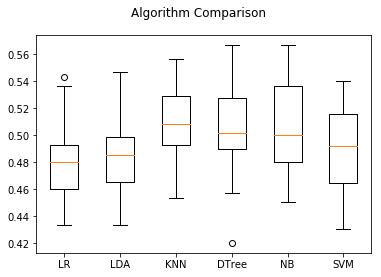

In [46]:
choose_best_classifier(X_cls, y)

# PCA

In [0]:
from sklearn.decomposition import PCA

## normalize X

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled.shape

(3000, 100)

In [0]:
pca = PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
std = pca.explained_variance_ratio_
std

array([5.04237706e-01, 1.74421837e-01, 1.25954588e-01, 4.22752545e-02,
       3.36213783e-02, 1.99171211e-02, 1.15079954e-02, 1.05110848e-02,
       8.28916710e-03, 7.41691871e-03, 6.32445067e-03, 5.79906471e-03,
       5.05404428e-03, 4.38839520e-03, 3.98103095e-03, 3.17287724e-03,
       2.80536536e-03, 2.36378601e-03, 2.17710105e-03, 1.87495022e-03,
       1.67885170e-03, 1.53784074e-03, 1.44524398e-03, 1.27973539e-03,
       1.18944282e-03, 9.77462502e-04, 9.17173295e-04, 8.26598184e-04,
       7.88358491e-04, 7.31678633e-04, 7.17401432e-04, 6.70401184e-04,
       6.44797657e-04, 6.02580944e-04, 5.81155702e-04, 5.01423264e-04,
       4.66570484e-04, 4.56217537e-04, 4.33453886e-04, 4.21970598e-04,
       3.91960180e-04, 3.67465598e-04, 3.27031379e-04, 3.08302559e-04,
       2.97700808e-04, 2.84793699e-04, 2.75366901e-04, 2.45652795e-04,
       2.19074628e-04, 2.14384929e-04, 2.07181699e-04, 2.04101942e-04,
       1.92144314e-04, 1.77489893e-04, 1.71384529e-04, 1.62871863e-04,
      

### Plot variance

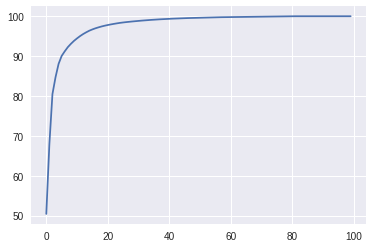

In [0]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

**^^As we can see 100% of variance is explained by 40 principle components**

LR: 0.501667 (0.032770)
LDA: 0.503000 (0.033680)
KNN: 0.501667 (0.037543)
DTree: 0.500000 (0.032318)
NB: 0.497333 (0.030869)
SVM: 0.500333 (0.039566)


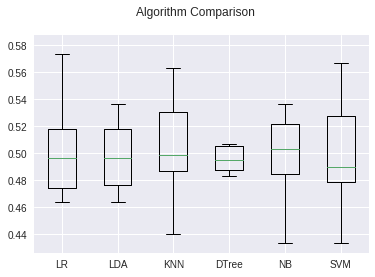

In [0]:
pca = PCA(30)
X_pca = pca.fit_transform(X_scaled)
choose_best_classifier(X_pca, y)